In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import accuracy_score
import importlib 
from scipy.stats import bernoulli, norm
from logistic_regression import LogisticRegression
from utils import *
from optimizers import *
import matplotlib.pyplot as plt
from tqdm import tqdm 
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_logs(optimizer_name, X_train, y_train, n_iter):
    if optimizer_name=="Adam":
        optimizer = Adam(random_state=123, max_iter=n_iter, learning_rate=1e-2, early_stopping=False, convergence_stopping=True, log_like_eval=True)
    elif optimizer_name=="SGD":
        optimizer = SGD(random_state=123, max_iter=n_iter, learning_rate=1e-3, early_stopping=False, convergence_stopping=True, log_like_eval=True)
    elif optimizer_name=="IWLS":
        optimizer = IWLS(random_state=123, max_iter=n_iter, learning_rate=1e-3, early_stopping=False, convergence_stopping=True, log_like_eval=True)
        
    lr_model = LogisticRegression(optimizer)
    results = lr_model.fit(X_train, y_train)
    return results.log_like, lr_model


def get_all_logs(df, n_iter):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    res_list = []
    accs = []
    for op_name in ["SGD", "Adam", "IWLS"]:
        res, model = get_logs(op_name, X_train, y_train, n_iter)
        res_list.append(res)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)*100
        accs.append(acc)

    return res_list, accs


def plot_logs(res_list, name):
    plt.plot(np.arange(1, len(res_list["SGD"])+1), res_list["SGD"], label="SGD")
    plt.plot(np.arange(1, len(res_list["Adam"])+1), res_list["Adam"], label="Adam")
    plt.plot(np.arange(1, len(res_list["IWLS"])+1), res_list["IWLS"], label="IWLS")
    plt.plot()
    plt.legend()
    plt.title(f"Log likelihood for {name} dataset")
    plt.xlabel("Epoch")
    plt.ylabel("Log likelihood")
    plt.show()

In [ ]:
datasets = {}

datasets['banana'] = load_banana()
print(f'Loaded banana')
datasets['magic_telescope'] = load_magic_telescope()
print(f'Loaded magic_telescope')
datasets['penguins'] = load_penguins_df()
print(f'Loaded penguins')
datasets['sonar'] = load_sonar()
print(f'Loaded sonar')
datasets['ionosphere'] = load_ionosphere()
print(f'Loaded ionosphere')
datasets['covertype'] = load_covertype()
print(f'Loaded covertype')
datasets['breast_cancer'] = load_breast_cancer()
print(f'Loaded breast_cancer')
datasets['airline'] = load_airline()
print(f'Loaded airline')
datasets['pcos'] = load_pcos()
print(f'Loaded pcos')

Loaded banana
Loaded magic_telescope
Loaded penguins
Loaded sonar


c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("Attribute2", axis=1, inplace=True)


Loaded ionosphere
Loaded covertype
Loaded breast_cancer
Loaded airline
Loaded pcos


In [ ]:
results = {}
accs = {}

for dataset_name in datasets.keys():
    results[dataset_name] = {}
    accs[dataset_name] = {}

    df = datasets[dataset_name]
    print(dataset_name)

    if len(df)>10000:
        df = df.sample(n=10000)

    res_list, acc_list = get_all_logs(df, 500)
    results[dataset_name]["SGD"] = res_list[0]
    results[dataset_name]["Adam"] = res_list[1]
    results[dataset_name]["IWLS"] = res_list[2]
    accs[dataset_name]["SGD"] = acc_list[0]
    accs[dataset_name]["Adam"] = acc_list[1]
    accs[dataset_name]["IWLS"] = acc_list[2]
    

banana


Model training:   3%|▎         | 14/500 [00:01<01:06,  7.30it/s]


Convergence detected
magic_telescope


Model training:  70%|███████   | 352/500 [00:08<00:03, 39.16it/s]


Convergence detected


Model training:   3%|▎         | 13/500 [00:04<02:50,  2.86it/s]


Convergence detected
penguins


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:23: RuntimeWarning: divide by zero encountered in log
  return np.sum(y*np.log(p)+(1-y+1e-8)*np.log(1-p+ 1e-8))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:20:

sonar


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in divide
  return 1/(a*(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\optimizers.py:111: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training: 100%|██████████| 500/500 [00:00<00:00, 595.84it/s]


ionosphere


Model training:  34%|███▍      | 169/500 [00:00<00:00, 654.93it/s]


Convergence detected


Model training:  18%|█▊        | 88/500 [00:00<00:01, 411.38it/s]c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:23: RuntimeWarning: divide by zero encountered in log
  return np.sum(y*np.log(p)+(1-y+1e-8)*np.log(1-p+ 1e-8))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:14: RuntimeWarning: overflow encountered in exp
  return -1*(y @ (coef @ X.T + intercept) - np.sum(np.log(1 + np.exp(-1*(coef @ X.T + intercept)))))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in log
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in divide
  return 1/(a*(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\optimi

covertype


Model training:   7%|▋         | 37/500 [00:27<05:33,  1.39it/s]c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in divide
  return 1/(a*(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\optimizers.py:111: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training: 100%|██████████| 500/500 [04:11<00:00,  1.99it/s]


breast_cancer


Model training:  71%|███████   | 353/500 [00:00<00:00, 395.71it/s]


Convergence detected


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in divide
  return 1/(a*(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\optimizers.py:111: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training: 100%|██████████| 500/500 [00:02<00:00, 248.60it/s]


airline


Model training:   3%|▎         | 13/500 [00:06<03:53,  2.09it/s]


Convergence detected
pcos


Model training:   0%|          | 0/500 [00:00<?, ?it/s]c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.log(a/(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\utils.py:20: RuntimeWarning: divide by zero encountered in divide
  return 1/(a*(1-a))
c:\Users\Julia\Desktop\Magisterka\Semestr_1\Adv_ML\Project\Advanced-Machine-Learning\project_1\optimizers.py:111: RuntimeWarning: invalid value encountered in multiply
  W = np.diag(1 / (logit_derivative(p)**2 * p*(1-p)))
Model training: 100%|██████████| 500/500 [00:01<00:00, 300.32it/s]


In [ ]:
index_datasets = ['banana', 'magic_telescope', 'penguins', 'sonar', 'ionosphere', 'covertype', 'breast_cancer', 'airline', 'pcos']
col_models = ["SGD", "Adam", "IWLS"]
avg_df = pd.DataFrame(columns = col_models, index=index_datasets)
for ind in index_datasets:
    for col in col_models:
        avg = np.mean(accs[ind][col])
        avg_df.loc[ind, col] = avg
avg_df

,SGD,Adam,IWLS
banana,88.0625,88.0625,87.9375
magic_telescope,80.15,80.25,80.25
penguins,100.0,100.0,63.768116
sonar,73.809524,71.428571,50.0
ionosphere,91.549296,88.732394,36.619718
covertype,72.8,72.9,45.0
breast_cancer,99.122807,99.122807,64.035088
airline,87.3,87.45,87.3
pcos,90.740741,90.740741,72.222222


In [ ]:
for dataset_name in datasets.keys():
    res_list = results[dataset_name]
    print(f"{dataset_name}: SGD={len(res_list["SGD"])}, Adam={len(res_list["Adam"])}, IWLS={len(res_list["IWLS"])}")

banana: SGD=500, Adam=500, IWLS=15
magic_telescope: SGD=500, Adam=353, IWLS=14
penguins: SGD=500, Adam=500, IWLS=500
sonar: SGD=500, Adam=500, IWLS=500
ionosphere: SGD=500, Adam=170, IWLS=500
covertype: SGD=500, Adam=500, IWLS=500
breast_cancer: SGD=500, Adam=354, IWLS=500
airline: SGD=500, Adam=500, IWLS=14
pcos: SGD=500, Adam=500, IWLS=500


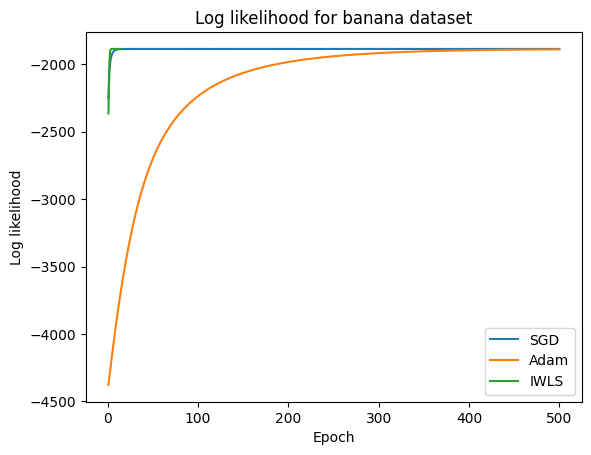

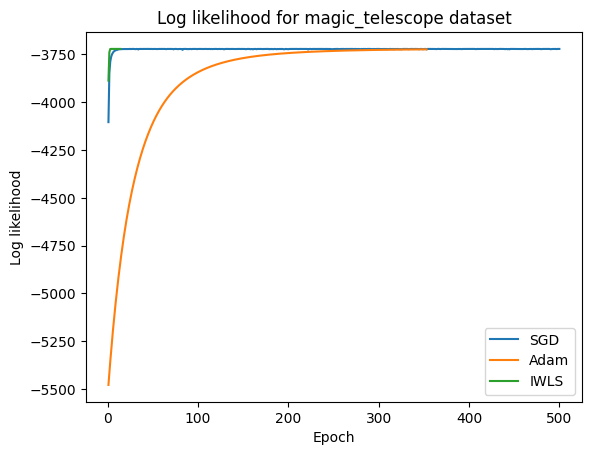

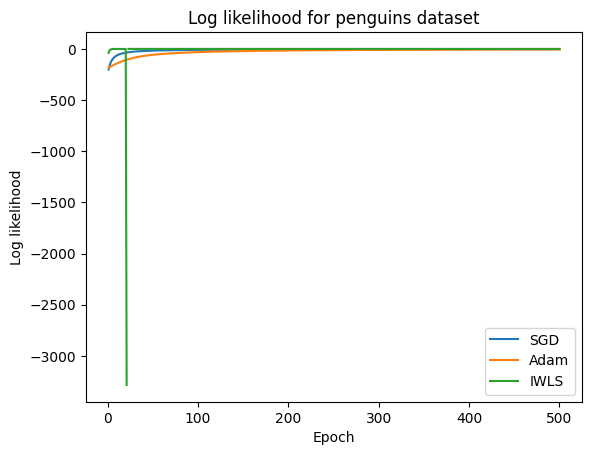

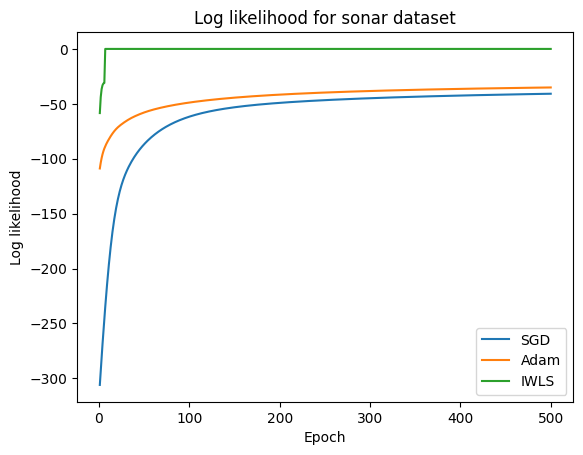

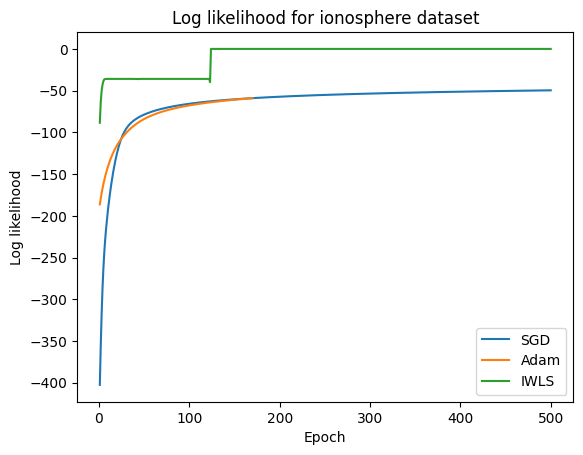

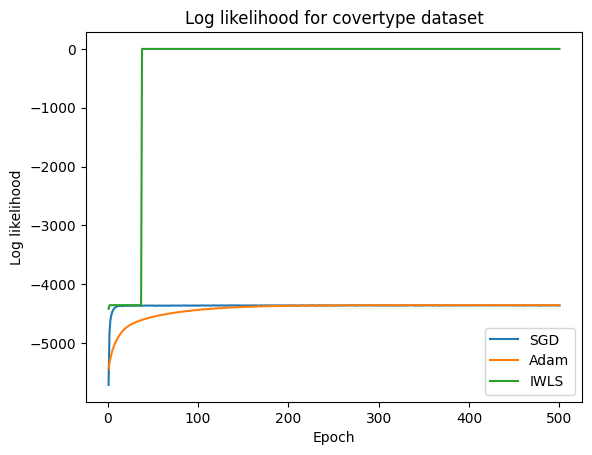

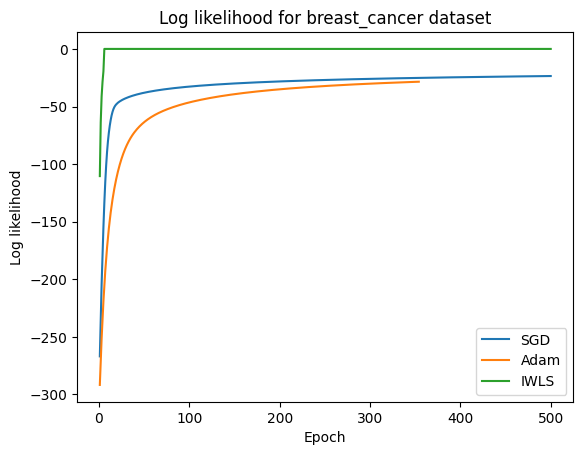

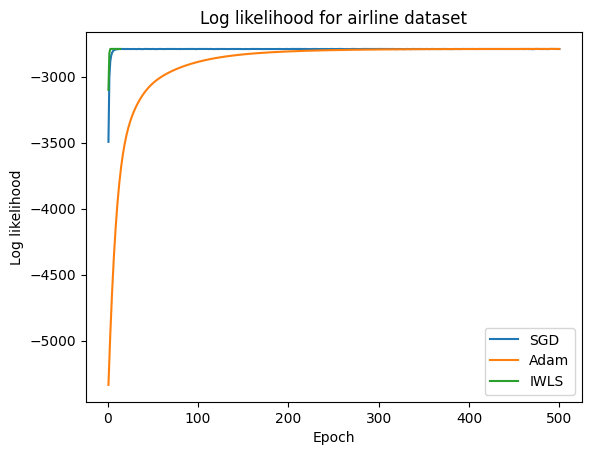

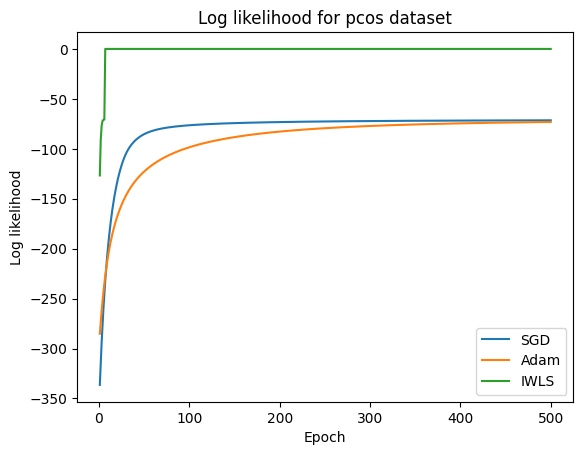

In [ ]:
for dataset_name in datasets.keys():
    res_list = results[dataset_name]
    plot_logs(res_list, dataset_name)